<a href="https://colab.research.google.com/github/aldrenjunior/Disease-Alzheimer-Classification-Through-Support-Vector-Machine/blob/main/Disease_Alzheimer_Classification_Through_Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import the data
dir = '/content/drive/MyDrive/SVClassifier/Dataset-DA'

In [4]:
#adjust the data
categories = ['Demented', 'NoDemented']

data = []

for category in categories:
  path = os.path.join(dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    da_img = cv2.imread(imgpath, 0)
    image = np.array(da_img).flatten()

    data.append([image, label])

In [5]:
#saving data
pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [6]:
#loading data
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [7]:
#sorting the data at random
random.shuffle(data)
features = []
labels = []

for feature, label in data:
  features.append(feature)
  labels.append(label)

Accuracy:  0.7818181818181819
Prediction is:  NoDemented


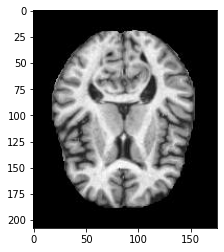

In [11]:
#defining the training model
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25)

model = SVC(C=1, kernel = 'poly', gamma='auto')
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

#print result
print('Accuracy: ', accuracy)
print('Prediction is: ', categories[prediction[0]])

da_predict = xtest[0].reshape(208,176)
plt.imshow(da_predict, cmap='gray')
plt.show()